In [479]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [480]:
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Analysis Data

## Portfolio

id (string) - offer id 
offer_type (string) - type of offer ie BOGO, discount, informational 
difficulty (int) - minimum required spend to complete an offer 
reward (int) - reward given for completing an offer 
duration (int) - time for offer to be open, in days 
channels (list of strings) """

In [481]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


## Transcript

In [482]:
transcript.sample(10)

,person,event,value,time
111806,8cb835dd91384cbba5d0b069da2528c7,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},336
225760,b7304b8578f64de99172fa5a49327739,transaction,{'amount': 5.14},522
110085,1502fe1c8f9c4973bc0631d34f5147bf,transaction,{'amount': 22.03},330
66359,e23280a162b34a94a7b45ce5d9b18b7a,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,168
282871,deeef143acba4e409fd95f483858f2d0,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},624
141464,f17d13f232ad4eaa973185c5a07d991d,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},372
6900,6363b3defa2840238002a35b719010a7,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
211218,2a4d94828f484c368909d5c799123758,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},504
197686,99aa41a074f247aea838f630c7acaf76,transaction,{'amount': 1.49},486
220498,aa85d9108050430886b7cdf7d2f3de1f,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},510


In [483]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [484]:
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

## Profiles

In [485]:
profile.sample(10)

,gender,age,id,became_member_on,income
3440,F,57,38e48296b33941d29f28ece6a2868fa9,20170826,66000.0
7629,F,37,c62495616d1a475e9d6af7827c6dfd86,20180618,72000.0
13464,M,71,432d46d47f4d4db6832de94d77f7876d,20151101,51000.0
9367,M,47,bc9320cc000741509180ead338d30ace,20180418,46000.0
12810,M,61,6e63df67194c449d8e5aacebc45db63c,20180214,37000.0
13159,M,41,208774c819704d538c82f1d2b67a757d,20170603,31000.0
13917,F,78,0fe517e9c3c841518e39be9bf741807a,20170818,66000.0
12538,M,54,75b598c650514c7f9c29e99c021df25f,20160416,113000.0
8081,F,41,10cbaa18d359457d899edf285d85a9b4,20170113,64000.0
13237,F,86,8ca32e0f16964fcbae0d3773c536d21f,20161003,116000.0


In [486]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

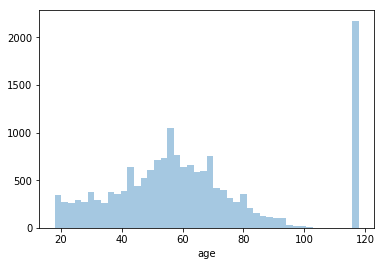

In [487]:
sns.distplot(profile.age,kde=False) 

In [488]:
profile[profile['age']>110]

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


In [489]:
profile_df = profile.copy()

In [490]:
profile_df.dropna(inplace=True)
profile_df.reset_index(drop=True, inplace=True)

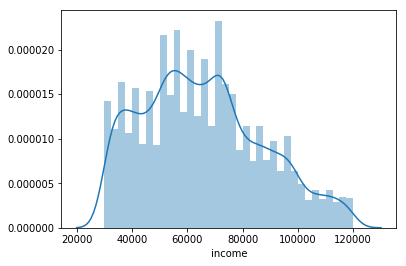

In [491]:
sns.distplot(profile_df.income)

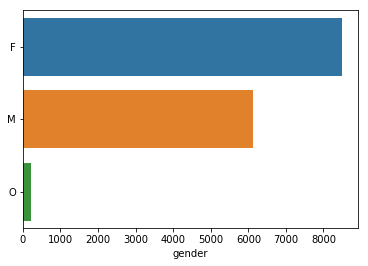

In [492]:
gender_count = profile_df.gender.value_counts()
genders = profile_df.gender.unique()
sns.barplot(gender_count,y=genders)

In [493]:
ages_df = profile_df
ages_df.loc[(profile_df['age'] >10) & (profile_df['age'] <=19 ), 'Age'] = "10's"
ages_df.loc[(profile_df['age'] > 20) & (profile_df['age'] <= 29), 'Age'] = "20's"
ages_df.loc[(profile_df['age'] > 30) & (profile_df['age'] <= 39), 'Age'] = "30's"
ages_df.loc[(profile_df['age'] > 40) & (profile_df['age'] <= 49), 'Age'] = "40's"
ages_df.loc[(profile_df['age'] > 50) & (profile_df['age'] <= 59), 'Age'] = "50's"
ages_df.loc[(profile_df['age'] > 60) & (profile_df['age'] <= 69), 'Age'] = "60's"
ages_df.loc[(profile_df['age'] > 70) & (profile_df['age'] <= 79), 'Age'] = "70's"
ages_df.loc[(profile_df['age'] > 80) & (profile_df['age'] <= 89), 'Age'] = "80's"
ages_df.loc[(profile_df['age'] > 90) & (profile_df['age'] <= 99), 'Age'] = "90's"
ages_df.loc[profile_df['age'] > 100, 'Age'] = "100's"

In [494]:
female_df = ages_df[ages_df['gender'] == 'F']
male_df = ages_df[ages_df['gender'] == 'M']
other_df = ages_df[ages_df['gender'] == 'O']

Text(0.5,1,'Other income')

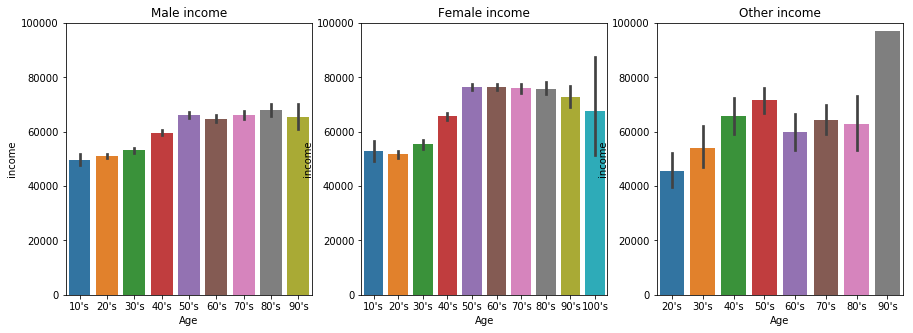

In [495]:
fig,ax = plt.subplots(figsize=(15,5),
                    nrows=1,
                    ncols=3)
plt.sca(ax[0])
male_age = male_df.sort_values(by='age')
sns.barplot(x=male_age.Age,y=male_df.income)
plt.ylim(0,100000)
plt.title('Male income')

plt.sca(ax[1])
female_age = female_df.sort_values(by='age')
sns.barplot(x=female_age.Age,y=female_df.income)
plt.ylim(0,100000)
plt.title('Female income')

plt.sca(ax[2])
other_age = other_df.sort_values(by='age')
plt.ylim(0,100000)
sns.barplot(x=other_age.Age,y=other_df.income)
plt.title('Other income')

In [496]:
from datetime import date

actual_date = date.today()
actual_date = pd.to_datetime(actual_date)
profile_df['became_member_on'] = pd.to_datetime(profile_df['became_member_on'], format='%Y%m%d')
profile_df.became_member_on = (actual_date - profile_df['became_member_on'])/np.timedelta64(1,'D')
profile_df.rename(columns={'became_member_on': 'membership_days'}, inplace=True)

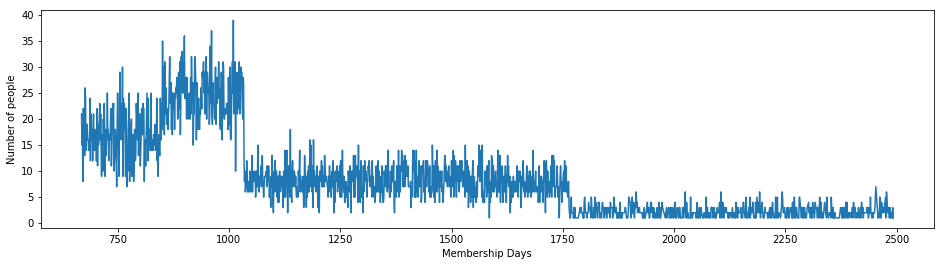

In [497]:
member = profile_df.groupby(['membership_days'])['id'].count()
plt.figure(figsize=(16,4))
plt.xlabel('Membership Days')
plt.ylabel('Number of people')
plt.plot(member)

In [498]:
#Encoding gender
from sklearn.preprocessing import MultiLabelBinarizer

encoder = MultiLabelBinarizer()
profile_encoded = encoder.fit(profile_df['gender'])
gender_df = pd.DataFrame(profile_encoded.transform(profile_df['gender']),columns=profile_encoded.classes_)
profile_df = profile_df.drop(columns=['gender'],axis=1)
profile_df = pd.concat([profile_df,gender_df],axis=1)

In [499]:
profile_df

,age,id,membership_days,income,Age,F,M,O
0,55,0610b486422d4921ae7d2bf64640c50b,1045.0,112000.0,50's,1,0,0
1,75,78afa995795e4d85b5d9ceeca43f5fef,1112.0,100000.0,70's,1,0,0
2,68,e2127556f4f64592b11af22de27a7932,760.0,70000.0,60's,0,1,0
3,65,389bc3fa690240e798340f5a15918d5c,836.0,53000.0,60's,0,1,0
4,58,2eeac8d8feae4a8cad5a6af0499a211d,926.0,51000.0,50's,0,1,0
...,...,...,...,...,...,...,...,...
14820,45,6d5f3a774f3d4714ab0c092238f3a1d7,721.0,54000.0,40's,1,0,0
14821,61,2cb4f97358b841b9a9773a7aa05a9d77,682.0,72000.0,60's,0,1,0
14822,49,01d26f638c274aa0b965d24cefe3183f,1215.0,73000.0,40's,0,1,0
14823,83,9dc1421481194dcd9400aec7c9ae6366,1540.0,50000.0,80's,1,0,0


In [500]:
portfolio_df = portfolio.copy()

In [501]:
transcript_df = transcript.copy()
transcript_df.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [502]:
transcript_df.sample(10)

,person,event,value,time
135152,b2f79fa7cb3f48c984dfe5df60d04e74,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},354
287104,9a9ad4808e9148459f56a8b8bdfa18da,transaction,{'amount': 3.83},636
35157,46f6c92a6ae84f21bd70bad9bc4d7101,transaction,{'amount': 23.1},66
200494,e789213c809347128dd9fe36a0db7f1a,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,498
220546,8665d22978b14ce1954f4b373138f0a3,transaction,{'amount': 2.36},510
96620,2ad11a6f663a4ac1ae56b0b0c54c8086,transaction,{'amount': 1.49},258
177014,454b00bdd77c4f588eb9f6cafd81dc5d,transaction,{'amount': 20.9},426
11481,f0c40762405c4b87bbb244c5b90001ed,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
254623,aef581890b724d55bb806394eb7e76e7,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},576
12602,361539b15a6243dc834c6b25e481570b,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [503]:
event_df = transcript_df
event_df['event'] = event_df.event.str.replace(' ','_')
response_df = event_df.copy()
trans_encod =pd.get_dummies(event_df['event'])
event_df = pd.concat([event_df,trans_encod],axis=1)
event_df = event_df.drop(columns=['event'],axis=1)

In [504]:
event_df = event_df.set_index('person')
profile_df = profile_df.set_index('id')

In [505]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14825 entries, 0610b486422d4921ae7d2bf64640c50b to e4052622e5ba45a8b96b59aba68cf068
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              14825 non-null  int64  
 1   membership_days  14825 non-null  float64
 2   income           14825 non-null  float64
 3   Age              13308 non-null  object 
 4   F                14825 non-null  int32  
 5   M                14825 non-null  int32  
 6   O                14825 non-null  int32  
dtypes: float64(2), int32(3), int64(1), object(1)
memory usage: 752.8+ KB


In [506]:
#profile_df = profile_df.reset_index()
profile_df = profile_df.rename(columns ={'id': 'person'})

In [507]:
profile_df

,age,membership_days,income,Age,F,M,O
id,,,,,,,
0610b486422d4921ae7d2bf64640c50b,55,1045.0,112000.0,50's,1,0,0
78afa995795e4d85b5d9ceeca43f5fef,75,1112.0,100000.0,70's,1,0,0
e2127556f4f64592b11af22de27a7932,68,760.0,70000.0,60's,0,1,0
389bc3fa690240e798340f5a15918d5c,65,836.0,53000.0,60's,0,1,0
2eeac8d8feae4a8cad5a6af0499a211d,58,926.0,51000.0,50's,0,1,0
...,...,...,...,...,...,...,...
6d5f3a774f3d4714ab0c092238f3a1d7,45,721.0,54000.0,40's,1,0,0
2cb4f97358b841b9a9773a7aa05a9d77,61,682.0,72000.0,60's,0,1,0
01d26f638c274aa0b965d24cefe3183f,49,1215.0,73000.0,40's,0,1,0


In [508]:
merged_df = profile_df.merge(event_df, left_index=True, right_index=True)

In [509]:
female_df = merged_df[merged_df['F'] == 1]
male_df = merged_df[merged_df['M'] == 1]
other_df = merged_df[merged_df['O'] == 1]

In [510]:
def plotOffer(df,df_name):
    receivedOffer = df.offer_received.sum()
    viewedOffer = df.offer_viewed.sum()
    completedOffer = df.offer_completed.sum()
    #d = 'offer_received':[receivedOffer],'offer_viewed':[viewedOffer],'offer_completed':[completedOffer]}
    diff_r_v = ((receivedOffer-viewedOffer)/receivedOffer) * 100
    diff_v_c = ((viewedOffer-completedOffer)/viewedOffer) * 100
    diff_r_c = ((receivedOffer-completedOffer)/receivedOffer) * 100
    
    print(df_name + ' diffrence Received and Viewed: -{:.2f}%'.format(diff_r_v))
    print(df_name + ' diffrence Viewed and Completed: -{:.2f}%'.format(diff_v_c))
    print(df_name + ' diffrence Received and Completed: -{:.2f}%'.format(diff_r_c))
    print('\n')
    return [receivedOffer,viewedOffer,completedOffer]

Male diffrence Received and Viewed: -25.78%
Male diffrence Viewed and Completed: -41.82%
Male diffrence Received and Completed: -56.82%


Female diffrence Received and Viewed: -24.29%
Female diffrence Viewed and Completed: -25.54%
Female diffrence Received and Completed: -43.63%


Others diffrence Received and Viewed: -15.61%
Others diffrence Viewed and Completed: -35.19%
Others diffrence Received and Completed: -45.31%




Text(0.5,1,'Other offers')

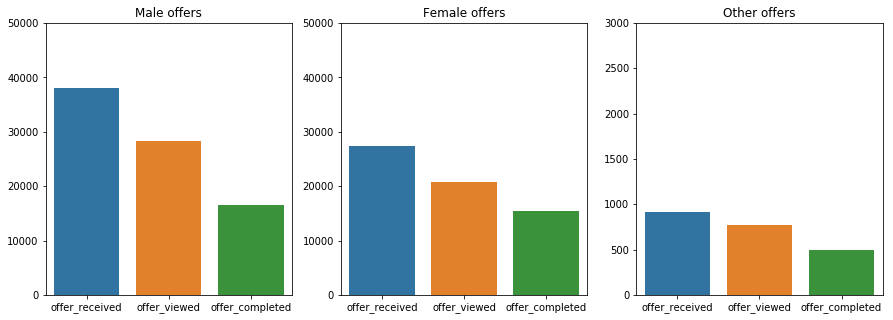

In [511]:
fig,ax = plt.subplots(figsize=(15,5),
                    nrows=1,
                    ncols=3)
offers = ['offer_received','offer_viewed','offer_completed']
plt.sca(ax[0])
sns.barplot(x=offers,y=plotOffer(male_df , 'Male'))
plt.ylim(0,50000)
plt.title('Male offers')

plt.sca(ax[1])
sns.barplot(x=offers,y=plotOffer(female_df,'Female'))
plt.ylim(0,50000)
plt.title('Female offers')

plt.sca(ax[2])
sns.barplot(x=offers,y=plotOffer(other_df,'Others'))
plt.ylim(0,3000)
plt.title('Other offers')

In [512]:
completed_df = response_df[response_df['event'] == 'offer_completed'].copy()
completed_df = pd.concat([completed_df, completed_df['value'].apply(pd.Series)], axis=1)
completed_df.drop(['value','reward','time'],inplace=True, axis=1)
completed_df.drop_duplicates(inplace=True)

In [513]:
completed_df

,person,event,offer_id
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer_completed,2906b810c7d4411798c6938adc9daaa5
12672,fe97aa22dd3e48c8b143116a8403dd52,offer_completed,fafdcd668e3743c1bb461111dcafc2a4
12679,629fc02d56414d91bca360decdfa9288,offer_completed,9b98b8c7a33c4b65b9aebfe6a799e6d9
12692,676506bad68e4161b9bbaffeb039626b,offer_completed,ae264e3637204a6fb9bb56bc8210ddfd
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer_completed,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...
306470,452cdae2c68e4732a4177d3929562690,offer_completed,fafdcd668e3743c1bb461111dcafc2a4
306475,0c027f5f34dd4b9eba0a25785c611273,offer_completed,2298d6c36e964ae4a3e7e9706d1fb8c2
306497,a6f84f4e976f44508c358cc9aba6d2b3,offer_completed,2298d6c36e964ae4a3e7e9706d1fb8c2
306509,8431c16f8e1d440880db371a68f82dd0,offer_completed,fafdcd668e3743c1bb461111dcafc2a4


In [514]:
viewed_df = response_df[response_df['event'] == 'offer_viewed'].copy()
viewed_df = pd.concat([viewed_df, viewed_df['value'].apply(pd.Series)], axis=1)
viewed_df.drop(['value','time'],inplace=True, axis=1)
viewed_df.rename(columns={'offer id': 'offer_id'},inplace=True)
viewed_df.drop_duplicates(inplace=True)

In [515]:
completed_and_viewed = viewed_df.merge(completed_df,how='left',on=['person','offer_id'])

In [516]:
completed_and_viewed.rename(columns={'event_x': 'offer_viewed', 'event_y': 'offer_completed'},inplace=True)

In [517]:
completed_and_viewed['offer_viewed']= completed_and_viewed.offer_viewed.apply(lambda x: 1 if x == 'offer_viewed' else 0)

In [518]:
completed_and_viewed['offer_completed']= completed_and_viewed.offer_completed.apply(lambda x: 1 if x == 'offer_completed' else 0)

In [519]:
completed_and_viewed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49135 entries, 0 to 49134
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   person           49135 non-null  object
 1   offer_viewed     49135 non-null  int64 
 2   offer_id         49135 non-null  object
 3   offer_completed  49135 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.9+ MB


In [520]:
def return_response(df):
    if (df.offer_completed == 1) & (df.offer_viewed == 1):
        response = 1
    else:
        response = 0
    return response

In [521]:
completed_and_viewed['response'] = completed_and_viewed.apply(return_response,axis=1)

In [522]:
completed_and_viewed.drop(['offer_viewed','offer_completed'],axis=1,inplace=True)

In [523]:
completed_and_viewed.shape

(49135, 3)

In [527]:
profile_df.reset_index(inplace=True)
profile_df = profile_df.rename(columns={'id':'person'})

In [529]:
final_df = completed_and_viewed.merge(profile_df,how='left',on='person')
final_df.dropna(inplace=True)

In [530]:
final_df

,person,offer_id,response,age,membership_days,income,Age,F,M,O
0,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,1,65.0,836.0,53000.0,60's,0.0,1.0,0.0
1,d1ede868e29245ea91818a903fec04c6,5a8bc65990b245e5a138643cd4eb9837,0,53.0,982.0,52000.0,50's,0.0,0.0,1.0
2,102e9454054946fda62242d2e176fdce,4d5c57ea9a6940dd891ad53e9dbe8da0,1,69.0,1380.0,57000.0,60's,1.0,0.0,0.0
4,be8a5d1981a2458d90b255ddc7e0d174,5a8bc65990b245e5a138643cd4eb9837,0,39.0,2190.0,51000.0,30's,0.0,1.0,0.0
5,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,2906b810c7d4411798c6938adc9daaa5,1,42.0,1590.0,96000.0,40's,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
49126,345f9431137a49b3963221a55567c4a8,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,53.0,1146.0,77000.0,50's,0.0,1.0,0.0
49127,5a3f7fcb450a4cb693ab5267b4d49b40,5a8bc65990b245e5a138643cd4eb9837,0,59.0,950.0,102000.0,50's,1.0,0.0,0.0
49129,ec1761735b034ae8874bc979f0cd5862,5a8bc65990b245e5a138643cd4eb9837,0,56.0,1390.0,103000.0,50's,1.0,0.0,0.0
49132,84fb57a7fe8045a8bf6236738ee73a0f,5a8bc65990b245e5a138643cd4eb9837,0,64.0,1075.0,113000.0,60's,1.0,0.0,0.0


In [531]:
offer_dummies =pd.get_dummies(portfolio_df['offer_type'])
portfolio_df = pd.concat([portfolio_df,offer_dummies],axis=1)
portfolio_df = portfolio_df.drop(columns=['offer_type'],axis=1)

In [532]:
"Encoding channel featurees"
from sklearn.preprocessing import MultiLabelBinarizer

encoder = MultiLabelBinarizer()

cat_encoded = encoder.fit(portfolio['channels'])
channels_df = pd.DataFrame(cat_encoded.transform(portfolio['channels']),columns=cat_encoded.classes_)
portfolio_df = portfolio_df.drop(columns=['channels'],axis=1)
portfolio_df = portfolio_df.rename(columns={'id':'offer_id'})
portfolio_df = pd.concat([portfolio_df,channels_df],axis=1)
portfolio_df

,reward,difficulty,duration,offer_id,bogo,discount,informational,email,mobile,social,web
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd,1,0,0,1,1,1,0
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0,0,1,1,1,1
2,0,0,4,3f207df678b143eea3cee63160fa8bed,0,0,1,1,1,0,1
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,1,1,0,1
4,5,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,1,0,0,1
5,3,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,0,1,0,1,1,1,1
6,2,10,10,fafdcd668e3743c1bb461111dcafc2a4,0,1,0,1,1,1,1
7,0,0,3,5a8bc65990b245e5a138643cd4eb9837,0,0,1,1,1,1,0
8,5,5,5,f19421c1d4aa40978ebb69ca19b0e20d,1,0,0,1,1,1,1
9,2,10,7,2906b810c7d4411798c6938adc9daaa5,0,1,0,1,1,0,1


In [533]:
portfolio_df = portfolio_df.drop(['reward','difficulty','duration'], axis=1)

In [534]:
portfolio_df

,offer_id,bogo,discount,informational,email,mobile,social,web
0,ae264e3637204a6fb9bb56bc8210ddfd,1,0,0,1,1,1,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0,0,1,1,1,1
2,3f207df678b143eea3cee63160fa8bed,0,0,1,1,1,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,1,1,0,1
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,1,0,0,1
5,2298d6c36e964ae4a3e7e9706d1fb8c2,0,1,0,1,1,1,1
6,fafdcd668e3743c1bb461111dcafc2a4,0,1,0,1,1,1,1
7,5a8bc65990b245e5a138643cd4eb9837,0,0,1,1,1,1,0
8,f19421c1d4aa40978ebb69ca19b0e20d,1,0,0,1,1,1,1
9,2906b810c7d4411798c6938adc9daaa5,0,1,0,1,1,0,1


In [535]:
final_df = final_df.merge(portfolio_df,how='left', on='offer_id')

In [536]:
final_df['offer_id'] = final_df['offer_id'].map({'f19421c1d4aa40978ebb69ca19b0e20d':'offer_1',
                          '5a8bc65990b245e5a138643cd4eb9837':'offer_2',
                          '4d5c57ea9a6940dd891ad53e9dbe8da0':'offer_3',
                          '2906b810c7d4411798c6938adc9daaa5':'offer_4',
                          '2298d6c36e964ae4a3e7e9706d1fb8c2':'offer_5',
                          'ae264e3637204a6fb9bb56bc8210ddfd':'offer_6',
                          '9b98b8c7a33c4b65b9aebfe6a799e6d9':'offer_7',
                          'fafdcd668e3743c1bb461111dcafc2a4':'offer_8',
                          '3f207df678b143eea3cee63160fa8bed':'offer_9',
                          '0b1e1539f2cc45b7b9fa7c272da2e1d7':'offer_10'})

In [537]:
final_df['offer_id'].unique()

array(['offer_1', 'offer_2', 'offer_3', 'offer_4', 'offer_5', 'offer_6',
       'offer_7', 'offer_8', 'offer_9', 'offer_10'], dtype=object)

In [538]:
offer_dummies =pd.get_dummies(final_df['offer_id'])
final_df = pd.concat([final_df,offer_dummies],axis=1)
final_df.drop(['offer_id','person','Age'], axis=1, inplace=True)

In [539]:
final_df

,response,age,membership_days,income,F,M,O,bogo,discount,informational,...,offer_1,offer_10,offer_2,offer_3,offer_4,offer_5,offer_6,offer_7,offer_8,offer_9
0,1,65.0,836.0,53000.0,0.0,1.0,0.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,53.0,982.0,52000.0,0.0,0.0,1.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,69.0,1380.0,57000.0,1.0,0.0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,39.0,2190.0,51000.0,0.0,1.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,42.0,1590.0,96000.0,0.0,1.0,0.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38124,1,53.0,1146.0,77000.0,0.0,1.0,0.0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
38125,0,59.0,950.0,102000.0,1.0,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
38126,0,56.0,1390.0,103000.0,1.0,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
38127,0,64.0,1075.0,113000.0,1.0,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [540]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
norm = MinMaxScaler()

income_scal = scaler.fit_transform(final_df[['income']])
member_scal = scaler.fit_transform(final_df[['membership_days']])
age = norm.fit_transform(final_df[['age']])

In [541]:
final_df['income'] = income_scal
final_df['membership_days'] = member_scal
final_df['age'] = age

In [542]:
final_df

,response,age,membership_days,income,F,M,O,bogo,discount,informational,...,offer_1,offer_10,offer_2,offer_3,offer_4,offer_5,offer_6,offer_7,offer_8,offer_9
0,1,0.566265,-0.858614,-0.610275,0.0,1.0,0.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0.421687,-0.509395,-0.657616,0.0,0.0,1.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,0.614458,0.442587,-0.420912,1.0,0.0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0.253012,2.380036,-0.704956,0.0,1.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,0.289157,0.944888,1.425378,0.0,1.0,0.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38124,1,0.421687,-0.117121,0.525903,0.0,1.0,0.0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
38125,0,0.493976,-0.585936,1.709422,1.0,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
38126,0,0.457831,0.466506,1.756763,1.0,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
38127,0,0.554217,-0.286947,2.230171,1.0,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [543]:
final_df_x = final_df.iloc[:,1:]
final_df_y = final_df.iloc[:,0]

In [544]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


X_train, X_test, y_train, y_test = train_test_split(final_df_x,final_df_y, test_size=0.2, random_state=0)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [545]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60      3393
           1       0.69      1.00      0.81      4233

   micro avg       0.75      0.75      0.75      7626
   macro avg       0.84      0.72      0.71      7626
weighted avg       0.83      0.75      0.72      7626



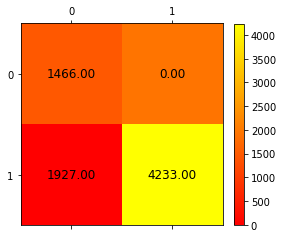

In [546]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test,y_pred)
img = plt.matshow(cm, cmap=plt.cm.autumn)
plt.colorbar(img, fraction=0.045)
for x in range(cm.shape[0]):
    for y in range(cm.shape[1]):
        plt.text(x,y, "%0.2f" %cm[x,y], size=12, color='black', ha='center', va='center')
plt.show()